# Data Analysis with Python 

## Importing the datasets

1. Acquire the data
2. Obtain basic insights from the data

[Link to the Automobile Data Set.](https://archive.ics.uci.edu/ml/datasets/Automobile?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01)

In [342]:
#! pip install ipywidgets

In [402]:
# ! pip install tqdm

In [412]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as pylab
import matplotlib.pyplot as pyplot
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
%matplotlib inline

In [26]:
pd.options.mode.chained_assignment = None  # default='warn'

In [173]:
# Read the online file by the URL provides above, and assign it to variable "df"
other_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(other_path, header=None)

In [174]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe:") 
df.head(5)

The first 5 rows of the dataframe:


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [175]:
# show the last 10 rows of the dataframe
print("The last 10 rows of the dataframe: \n")
df.tail(10)

The last 10 rows of the dataframe: 



,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
197,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


## Cleaning the Dataset

### Add Headers

In [176]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [177]:
# replace the headers and recheck the dataframe
df.columns = headers
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


### Handle missing values

In [178]:
# replace the ? symbol with NaN so the dropna() can remove the missing values
df1=df.replace('?',np.NaN)

In [179]:
# drop the missing values along the price column and view the data
df=df1.dropna(subset=["price"], axis=0)
df.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [180]:
# check the column names
print(df.columns)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [181]:
# save the dataset as a csv. Use index = false so the row names won't be written
df.to_csv("automobile.csv", index=False)

### Basic Insights of the Data

In [182]:
# check the types of the data
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [183]:
# get summary statistics
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [184]:
# get summary statistics including non-numerical values
df.describe(include = 'all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,164,201,201,201,199,201,201,201,201.000000,...,201.000000,201,197,197,201.000000,199,199,201.000000,201.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,58,22,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,7609
freq,NaN,11,32,181,165,113,94,118,198,NaN,...,NaN,92,23,19,NaN,19,36,NaN,NaN,2
mean,0.840796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,...,126.875622,NaN,NaN,NaN,10.164279,NaN,NaN,25.179104,30.686567,NaN
std,1.254802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,...,41.546834,NaN,NaN,NaN,4.004965,NaN,NaN,6.423220,6.815150,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,98.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [185]:
# use .describe() on columns length and compression-ratio
df[['length', 'compression-ratio']].describe()

,length,compression-ratio
count,201.000000,201.000000
mean,174.200995,10.164279
std,12.322175,4.004965
min,141.100000,7.000000
25%,166.800000,8.600000
50%,173.200000,9.000000
75%,183.500000,9.400000
max,208.100000,23.000000


In [186]:
# get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

## Data Wrangling

1. Handle more missing values
2. Correct the data format
3. Standardize and normalize the data

### Handle Missing Values

In [187]:
# convert ? to NaN. 
df.replace("?", np.nan, inplace = True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [188]:
# evaluate for missing data
missing_data = df.isnull()
missing_data.head(5)
# true means the value is missing

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [189]:
# count the number of missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    164
True      37
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    199
True       2
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
Fa


<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>

<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>

<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>

<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>


In [190]:
# calculate the mean value of normalized-losses
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [191]:
# replace NaN with mean value in normalized-losses
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [192]:
# calculate mean value of bore
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.330710659898477


In [193]:
# replace NaN with mean value of bore
df["bore"].replace(np.nan, avg_bore, inplace=True)

In [194]:
# calculate mean value for stroke
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

Average of stroke: 3.256903553299492


In [195]:
# replace NaN with mean value for stroke
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

In [196]:
# calculate mean value for horsepower
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 103.39698492462311


In [197]:
# replace NaN with mean value for horsepower
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [198]:
# calculate the mean value for peak-rpm
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5117.587939698493


In [199]:
# replace NaN with mean value of peak-rpm
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [200]:
# check which values are present in a num-of-doors column
df['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

In [201]:
# alternatively use .idxmax() to get the most common value
df['num-of-doors'].value_counts().idxmax()

'four'

In [202]:
# replace the missing num of doors value with the most frequent value
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [203]:
# drop all rows that do not have price data
df.dropna(subset=["price"], axis=0, inplace=True)

In [204]:
# reset the index due to the dropped rows
df.reset_index(drop=True, inplace=True)

In [205]:
# view the cleaned dataset
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Correct Data Format

In [206]:
# double check the data types for each column
df.dtypes
# we want numerical objects to be float or int
# variables with strings should be type object

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [207]:
# convert bore and stroke to float
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")

In [208]:
# convert normalized-losses to int
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")

In [209]:
# convert price to float
df[["price"]] = df[["price"]].astype("float")

In [210]:
# convert peak-rpm to float
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [211]:
# double check types
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Data Standardization

Standardization is the process of transforming the data into a common format, which allows for meaningful comparisons.

In [212]:
# scale the columns length, width, and height to normalize these variables between 0 and 1
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max() 

In [213]:
# view data
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


### Binning

Binning is the process of transforning continuous numerical variables into discrete categorical bins for grouped analysis.

In [214]:
# bin the horsepower data
# first convert to the correct datatype
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

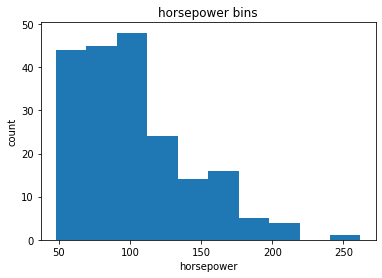

In [215]:
# plot the histogram of horsepower to see the distribution
pyplot.hist(df["horsepower"])

# set the labels and plot title
pyplot.xlabel("horsepower")
pyplot.ylabel("count")
pyplot.title("horsepower bins")

In [216]:
# we want 3 bins of equal size, so use numpy's Linspace() function
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [217]:
# set group names
group_names = ['Low', 'Medium', 'High']

In [218]:
# apply cut function to determine to which bin each value of horsepower belongs
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [219]:
# observe the number of vehicles in each bin
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

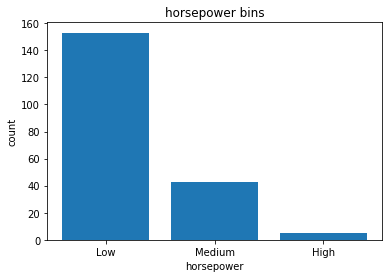

In [220]:
# plot the distribution of each bin
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
pyplot.xlabel("horsepower")
pyplot.ylabel("count")
pyplot.title("horsepower bins")
# this successfully narrowed down intervals from 57 to 3

Text(0.5, 1.0, 'horsepower bins')

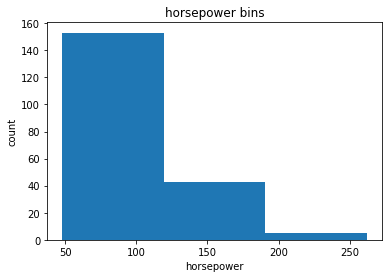

In [221]:
# use a histogram to plot horsepower with 3 bins

# draw historgram of attribute "horsepower" with bins = 3
pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
pyplot.xlabel("horsepower")
pyplot.ylabel("count")
pyplot.title("horsepower bins")

### Indicator / Dummy Variables

A dummy variable is a numerical variable used to label categories. They allow us to use categorical variables for regression analysis.

In [222]:
# create dummy variables for fuel-type
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [223]:
# change column names for clarity
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [224]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

In [225]:
# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [226]:
# view data
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,27,13495.0,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,27,16500.0,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,19,26,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,24,30,13950.0,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,18,22,17450.0,Low,0,1


In [227]:
# create a dummy variable for aspiration
dummy_variable_2 = pd.get_dummies(df['aspiration'])

In [228]:
# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

In [229]:
# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [230]:
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

In [231]:
# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

In [232]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,19,26,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,24,30,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,18,22,17450.0,Low,0,1,1,0


In [233]:
# save this dataset to csv
df.to_csv('clean_df.csv')

## Exploratory Data Analysis

1. Analyze individual feature patterns with visualization
2. Use descriptive statistical analysis
3. Use grouping
4. Utilize correlation
5. ANOVA

### Analyze Individual Feature Patterns

In [234]:
# use .corr() to calculate the correlation of the dataset
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075776,0.279719,-0.035527,0.036233,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,-0.225016,-0.181877,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371297,-0.360233,-0.470606,-0.543304,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579688,-0.286035,-0.665192,-0.698142,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.614972,-0.245852,-0.633531,-0.680635,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086901,-0.309913,-0.049800,-0.104812,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,0.758001,-0.279350,-0.749543,-0.794889,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,0.822636,-0.256753,-0.650546,-0.679571,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566786,-0.267338,-0.582121,-0.591390,0.543154,0.054435,-0.054435,-0.227782,0.227782
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097598,-0.063720,-0.034079,-0.034741,0.082267,0.241033,-0.241033,-0.218190,0.218190


In [235]:
# get the correlation between bore, stroke, compression-ratio, and horsepower
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001250,0.566786
stroke,-0.055390,1.000000,0.187854,0.097598
compression-ratio,0.001250,0.187854,1.000000,-0.214392
horsepower,0.566786,0.097598,-0.214392,1.000000


(0.0, 53155.51660301515)

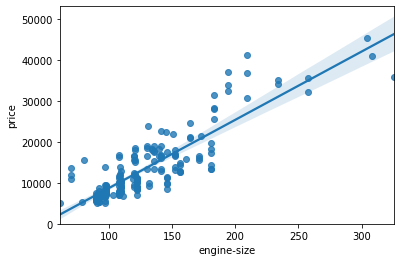

In [236]:
# analyze engine size and price using a scatterplot
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
pyplot.ylim(0,)

In [237]:
# examine engine size and price correlation
df[["engine-size", "price"]].corr()
# may be a good indicator of price

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

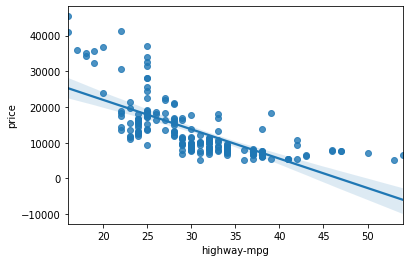

In [238]:
# create scatterplot of highway-mpg and price
sns.regplot(x="highway-mpg", y="price", data=df)
# could be a good indicator of price

In [239]:
# examine correlation between highway-mpg and price
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

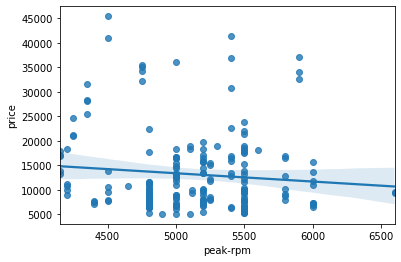

In [240]:
# create scatterplot for peak-rpm and price
sns.regplot(x="peak-rpm", y="price", data=df)
# does not seem like a good indicator of price

In [241]:
# examine correlation of peak-rpm and price
df[['peak-rpm','price']].corr()  
# weak linear relationship

,peak-rpm,price
peak-rpm,1.000000,-0.101542
price,-0.101542,1.000000


In [242]:
# find correlation of stroke and price
df[["stroke","price"]].corr()

,stroke,price
stroke,1.000000,0.082267
price,0.082267,1.000000


<AxesSubplot:xlabel='stroke', ylabel='price'>

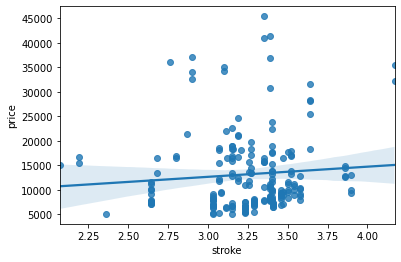

In [243]:
# There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well. We can see this using "regplot" to demonstrate this.
sns.regplot(x="stroke", y="price", data=df)

<AxesSubplot:xlabel='body-style', ylabel='price'>

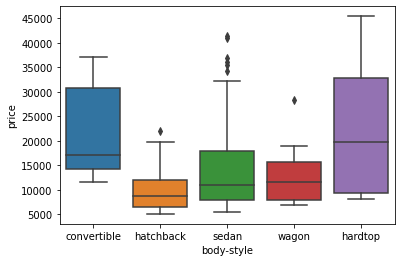

In [244]:
# use boxplots to better understand categorical variables
# analyze body-style and price relationship
sns.boxplot(x="body-style", y="price", data=df)
# there is significant overlap, so body style is not a good indicator of price

<AxesSubplot:xlabel='engine-location', ylabel='price'>

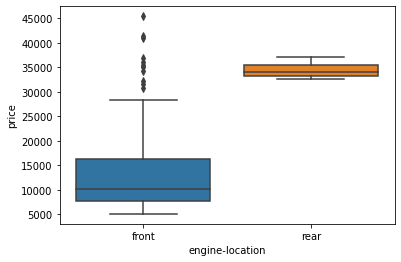

In [245]:
# plot engine-location and price
sns.boxplot(x="engine-location", y="price", data=df)
# engine could potentially be a good indicator of price

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

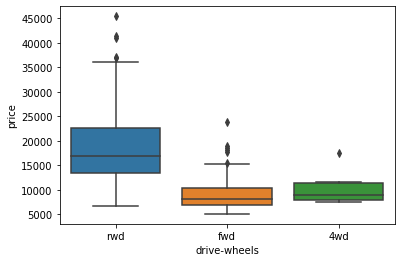

In [246]:
# plot drive-wheels and price
sns.boxplot(x="drive-wheels", y="price", data=df)
# potentially a good indicator of price

### Descriptive Statistical Analysis

In [247]:
# get basic statistics 
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330711,3.256904,10.164279,103.393035,5117.587940,25.179104,30.686567,13207.129353,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365623,478.113178,6.423220,6.815150,7947.066342,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000


In [248]:
# include objects in descriptive statistics
df.describe(include = ['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


In [249]:
# use value_counts() to get an understanding of how many units of drive-wheels we have
# note value_counts() only works on pandas series, not dataframes, so only use one bracke
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [250]:
# convert it into a dataframe
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()

In [251]:
# rename columns
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [252]:
# get engine-location count data 
engine_loc_counts = df['engine-location'].value_counts().to_frame()

In [253]:
# rename columns
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)

In [254]:
# update index name
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


### Grouping Basics

The groupby method groups data by different categories, based off one or several variables, and analysis is then performed on individual groups. 

In [255]:
# group drive-wheels
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [256]:
# group drive-wheels, body-style, and price
df_group_one = df[['drive-wheels','body-style','price']]

In [257]:
# calculate the average price for each category of data
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [258]:
# group by multiple variables drive-wheels, body-style, price
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1
# this data is much easier to visualize with a pivot table

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [259]:
# set up data for pivot table with drive wheels in rows, body-style to columns
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [260]:
# if there is some missing data, fill in
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [261]:
# use the groupby function to get the average price for each car based on body style
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


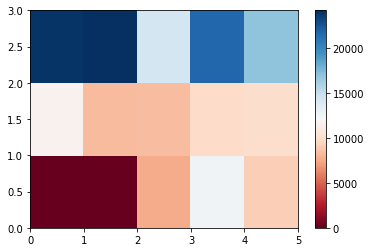

In [262]:
# use a heat map to visualize body style vs price
pyplot.pcolor(grouped_pivot, cmap='RdBu')
pyplot.colorbar()
pyplot.show()

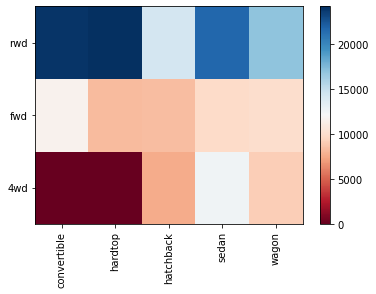

In [263]:
# update plot with detailed information
fig, ax = pyplot.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
pyplot.xticks(rotation=90)

fig.colorbar(im)
pyplot.show()

### Correlation and Causation

Correlation: a measure of the extent of interdependence between variables

Causation: the relationship between cause and effect between two variables.

Correlation does not imply causation. Determining correlation is much simpler than determining causation as causation may require independent experimentation.

Pearson Correlation:
- Measures the linear dependence between two variables X and Y.
- The resulting coefficient is a value between -1 and 1 where:
    - 1: perfect positive linear correlation
    - 0: no linear correlation
    - -1: perfect negative linear correlation
- Pearson correlation is the default method of function .corr()

P-value:
- The probability that the correlation between two variables is statistically significant. 
- Normally we choose a significance level of .05, which means we are 95% confident that the correlation is significant.
- By convention:
    - p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.
    - the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.
    - the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.
    - the p-value is $>$ 0.1: there is no evidence that the correlation is significant.
- Obtain this information using the stats module of the SciPy library.

In [264]:
# calculate the pearson correlation coefficient and p value of wheel base and price
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  
# since the p-value is <.001, the correlation is statistically significant
# though the linear relationship isn't super strong

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


In [265]:
# pearson correlation of horsepower vs price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  
# statistically significant and moderately strong relationship

The Pearson Correlation Coefficient is 0.8097290352560285  with a P-value of P =  5.924001027593172e-48


In [266]:
# pearson correlation of width vs price
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 
# statistically significant and strong linear relationship

The Pearson Correlation Coefficient is 0.7512653440522672  with a P-value of P = 9.20033551048217e-38


In [267]:
# curb weight vs price
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  
# statistically significant and quite strong relationship

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238894065e-53


In [268]:
# engine-size vs price
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
# statistically significant and very strong relationship

The Pearson Correlation Coefficient is 0.8723351674455182  with a P-value of P = 9.265491622200232e-64


In [127]:
# bore vs price
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 
# statistically significant and moderate linear relationship

The Pearson Correlation Coefficient is 0.5431537659807734  with a P-value of P =   8.051208825441016e-17


In [269]:
# city-mpg vs price
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  
# statistically significant and negative moderately strong relationship

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567641e-29


In [270]:
# highway mpg vs price
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 
# statistically significant and negative moderately strong relationship

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144476358e-31


### ANOVA

ANOVA:
- Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. 
- Returns two parameters:
    - F-Test score: ANOVA assumes the means of all groups are the same, calculates how much teh actual means deviate from teh assumption and reports it as the Ftest score.  A larger score indicates a larger difference between the means.
    - P-value: tells how statistically significant the calculated score value is.
- If the price variable is strongly correlated with the variable we're analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.

In [271]:
# group drive-wheels data to see if it impacts price
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [272]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [273]:
# use f_oneway in stats module to get f-test score and p-value
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  
# large f-score, small p-value indicates almost certain significance. 
# does this mean all 3 tested groups are this highly correlated?
# examine them separately

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


In [274]:
# FWD and RWD
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [275]:
# 4WD and RWD
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [276]:
# 4WD and FWD
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>

Categorical variables:

<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>

## Model Development

1. Linear Regression and Multiple Linear Regression
2. Model Evaluation with Visualization
3. Polynomial Regression and Pipelines
4. Measures for In-Sample Evaluation
5. Prediction and Decision Making

### Linear Regression

SLR:
- Simple linear regression is a method to help us understand the relationship between two variables:
    - predictor / independent variable (X)
    - response / dependent / target variable that we want to predict (Y)
- SLR's result is a linear function that predicts the response variable as a function of the predictor variable.

In [277]:
# create linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [278]:
# observe if highway-mpg could be a predictor of price
# set x and y
X = df[['highway-mpg']]
Y = df['price']

In [279]:
# fit the linear model
lm.fit(X,Y)

LinearRegression()

In [280]:
# output a prediction
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [281]:
# get the value of the intercept
lm.intercept_

38423.3058581574

In [282]:
# get value of slope
lm.coef_

array([-821.73337832])

In [283]:
# create linear regression object to be used for engine-size
lm1 = LinearRegression()

In [284]:
# fit the object
lm1.fit(df[['engine-size']], df[['price']])

LinearRegression()

In [285]:
# get the slope
lm1.coef_

array([[166.86001569]])

In [286]:
# get the intercept
lm1.intercept_

array([-7963.33890628])

In [287]:
# get the equation of the predicted line
Yhat=-7963.34 + 166.86*X
Yhat

,highway-mpg
0,-3458.12
1,-3458.12
2,-3624.98
3,-2957.54
4,-4292.42
...,...
196,-3291.26
197,-3791.84
198,-4125.56
199,-3458.12


### Multiple Linear Regression

MLR:
- If we want to use more variables in the model to predict car price, use MLR.
- It's very similar to SLR, but can be used to explain the relationship between one continuous dependent varaible and two+ independent variables. 

From previous sections, we know other potential good predictors of price include:
- horsepower
- curb-weight
- engine-size
- highway-mpg

In [288]:
# develop a model using the above variables as the predictors
# get a sub dataframe
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [289]:
# fit the linear model
lm.fit(Z, df['price'])

LinearRegression()

In [290]:
# get value of intercept
lm.intercept_

-15831.93096029949

In [291]:
# what are the values of the coefficients?
lm.coef_

array([53.66247317,  4.70938694, 81.44600167, 36.55016267])

In [292]:
# train an MLR model with predictors normalized-losses and highway-mpg
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [293]:
# get coefficients
lm2.coef_

array([   1.49789586, -820.45434016])

### Model Evaluation using Visualization

One way to evaluate the models and choose which one is the best option is to use visualization tools such as:
- Regression plots
- Residual plots
- Distribution plots

Regression Plots:
- an excellent way to visualize SLR
- shows a combination of scatterplot and a fitted linear regression line
- gives a reasonable estimate of the relationship, strength of the correlation, and direction.

Residual Plots:
- The residual is the difference between the observed value Y and the predicted value Yhat. 
- when looking at a regression plot, the residual is the distance between a data point to the fitted line. 
- a residual plot shows the residuals on the y-axis and the independent on the x-axis.
- If the points on the residual are randomly spread out around the x-axis, a linear model is appropriate for the data. 

Distribution Plots:
- Useful for visualizing MLR
- Observe the fit of the model by looking at the distribution plot.  
- Compare the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

(0.0, 48173.16523919806)

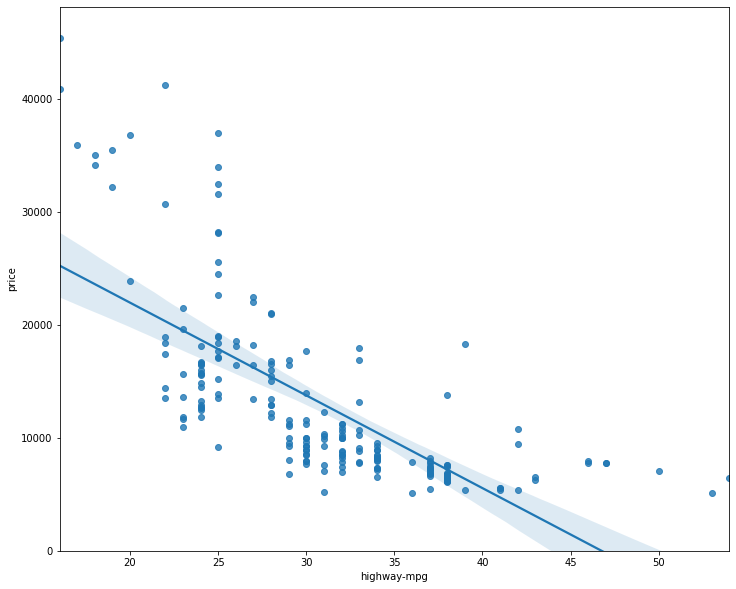

In [294]:
# visualize highway mpg as a potential predictor of price
width = 12
height = 10
pyplot.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
pyplot.ylim(0,)

(0.0, 47414.1)

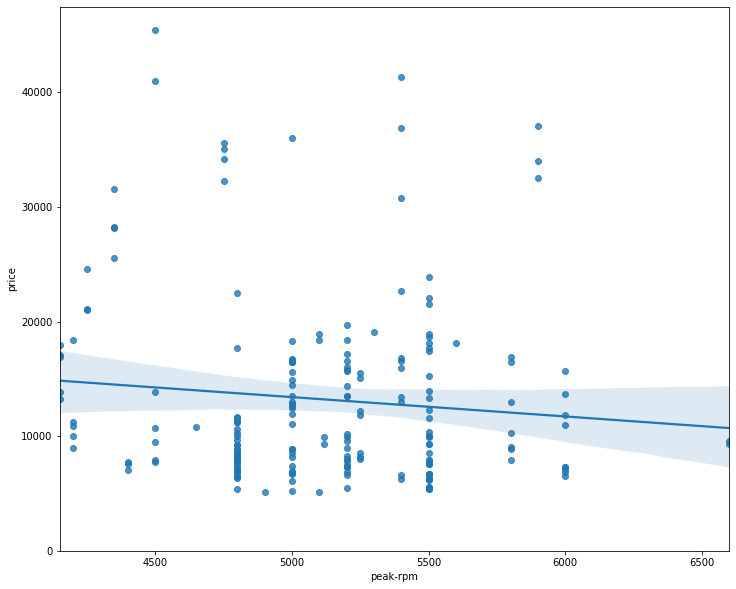

In [295]:
# plot peak-rpm
pyplot.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
pyplot.ylim(0,)
# 

In [296]:
# between highway-mpg and peak-rpm, which is more strongly correlated with price?
df[["peak-rpm","highway-mpg","price"]].corr()
# highway-mpg

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058605,-0.101542
highway-mpg,-0.058605,1.000000,-0.704692
price,-0.101542,-0.704692,1.000000


C:\Users\orgil\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


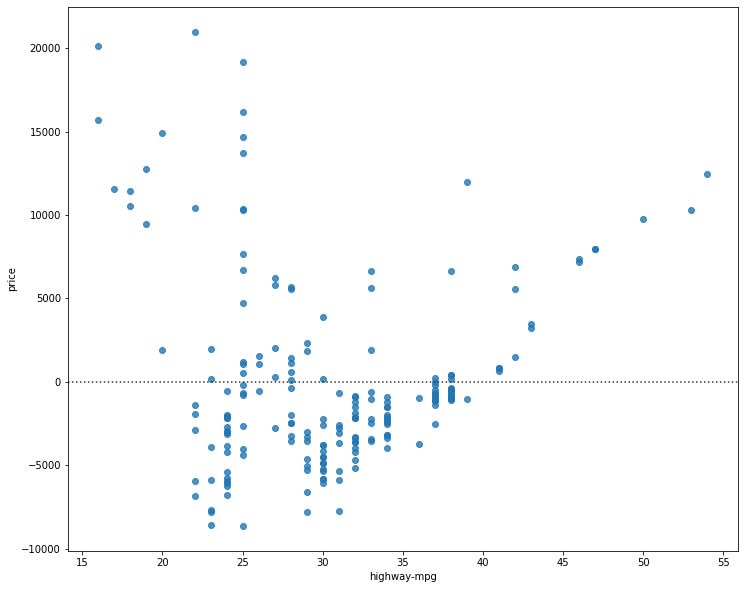

In [297]:
# create a residual plot for highway-mpg
width = 12
height = 10
pyplot.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
pyplot.show()
# the residuals aren't randomly spread around the axis, so perhaps a non-linear model is more appropriate

In [298]:
# make a prediction for MLR
Y_hat = lm.predict(Z)

C:\Users\orgil\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\orgil\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


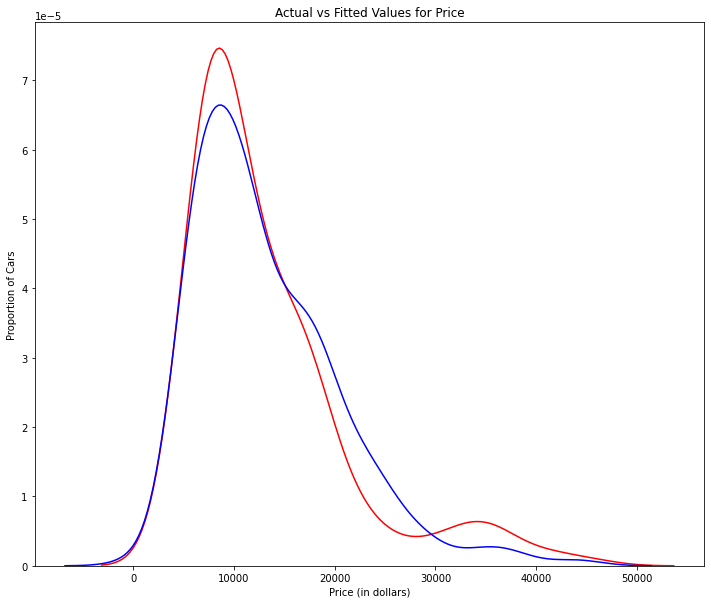

In [299]:
# plot the distribution
pyplot.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


pyplot.title('Actual vs Fitted Values for Price')
pyplot.xlabel('Price (in dollars)')
pyplot.ylabel('Proportion of Cars')

pyplot.show()
pyplot.close()
# the fitted values are reasonably close tot eh actual values, but there is room for improvement.

### Polynomial Regression

Polynomial Regression
- A particular case of the SLR or MLR models.
- We get non-linear relationships by using higher-order terms of the predictor variables.

In [300]:
# use a non-linear model for highway-mpg
# define plotpolly function to plot the data
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    pyplot.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    pyplot.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = pyplot.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = pyplot.gcf()
    pyplot.xlabel(Name)
    pyplot.ylabel('Price of Cars')

    pyplot.show()
    pyplot.close()

In [301]:
# get the variables
x = df['highway-mpg']
y = df['price']

In [302]:
# fit the polynomial 
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


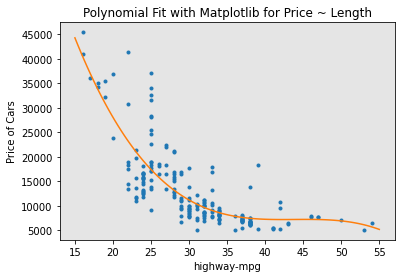

In [303]:
# plot the function
PlotPolly(p, x, y, 'highway-mpg')

In [304]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,19,26,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,24,30,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,18,22,17450.0,Low,0,1,1,0


In [305]:
# plotting indicates that this polynomial model fits better than the linear model
# because the generated polynomial function 'hits' more of the data points.
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


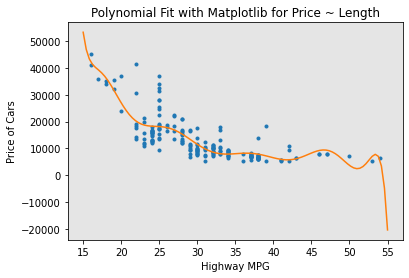

In [306]:
# try an 11th order polynomial model
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [309]:
# create a polynomial feature object
pr=PolynomialFeatures(degree=2)

In [310]:
# fit the object
Z_pr=pr.fit_transform(Z)

In [311]:
# original data shape
Z.shape

(201, 4)

In [312]:
# transformed shape
Z_pr.shape

(201, 15)

### Pipelines

Pipelines simplify the steps of processing the data.

In [314]:
# create a list of tuples with the name of the model/estimator and its constructor
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [315]:
# input the list as an argument to the pipeline constructor
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [316]:
# convert the data type of z to float to avoid conversion warnings
Z = Z.astype(float)

In [317]:
# use the pipeline to normalize the data, perform the transformation, and fit the model simulataneously
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [318]:
# use the pipeline to normalize the data, perform a transformation, and produce a prediction simultaneously
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13103.67557905, 13103.67557905, 18229.84126783, 10394.17656982])

In [319]:
# create a pipeline that standardizes the data, produces a prediction using a linear regression model with Z and y
Input=[('scale',StandardScaler()),('model',LinearRegression())]
pipe=Pipeline(Input)

# fit the pipeline
pipe.fit(Z,y)

# get a prediction
ypipe=pipe.predict(Z)
ypipe[0:10]

array([13698.95609311, 13698.95609311, 19056.78572196, 10621.59764327,
       15519.32197778, 13867.78444008, 15454.84783873, 15972.88040209,
       17614.41285158, 10723.08344825])

### Measures for In-Sample evaluation

When evaluating models, not only do we want visualizations of the results but we also need a quantitative measure to determine the accuracy of the model. 

Two important measures often used are:
- R-squared
- Mean Squared Error (MSE)

R-Squared:
- coefficient of determination
- a measure to indicate how close the data is to the fitted regression line
- the value of R-Squared if the percentage of variation of the response variable (y) that is explained by the linear model
- when comparing models, the model with the higher Rsquare value is a better fit for the data.

MSE:
- measures the average of the square of errors, i.e. the difference between actual value Y and estimated value Yhat
- when comparing models, the model with the smallest MSE is a better fit for the data.


In [320]:
# calculate Rsquare of SLR model
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [321]:
# calculate MSE
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [323]:
# compare predicted results with actual results
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [324]:
# calculate Rsquare of MLR model
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.80943904228153


In [325]:
# get a prediction
Y_predict_multifit = lm.predict(Z)

In [326]:
# compare predicted results with actual results
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11975165.99330355


In [328]:
# get Rsquare of Polynomial model
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [329]:
# get MSE of polynomial model
mean_squared_error(df['price'], p(x))

20474146.426361218

### Prediction and Decision Making

Use the method predict to produce a prediction.

In [330]:
# create new input
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [331]:
# fit the model
lm.fit(X, Y)

LinearRegression()

In [332]:
# produce prediction
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

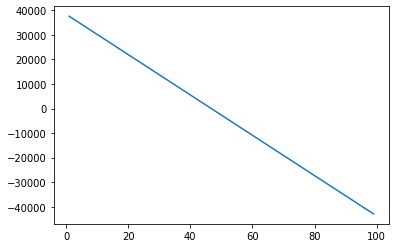

In [333]:
# plot the data
pyplot.plot(new_input, yhat)
pyplot.show()

### Decision Making: Determining a Good Model Fit

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

Let's take a look at the values for the different models.
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>

<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>

<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


**Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)**

<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.


**Simple Linear Model (SLR) vs. Polynomial Fit**

<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>



**Multiple Linear Regression (MLR) vs. Polynomial Fit**

<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


**Conclusion**
<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>


## Model Evaluation

1. Model Evaluation
2. Overfitting, Underfitting, and Model Selection
3. Ridge Regression
4. Grid Search

In [338]:
# Import clean data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)

In [339]:
# save the data
df.to_csv('module_5_auto.csv')

In [340]:
# get numeric data only
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [344]:
# functions for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    pyplot.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    pyplot.title(Title)
    pyplot.xlabel('Price (in dollars)')
    pyplot.ylabel('Proportion of Cars')

    pyplot.show()
    pyplot.close()

In [345]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    pyplot.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    pyplot.plot(xtrain, y_train, 'ro', label='Training Data')
    pyplot.plot(xtest, y_test, 'go', label='Test Data')
    pyplot.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    pyplot.ylim([-10000, 60000])
    pyplot.ylabel('Price')
    pyplot.legend()

### Training and Testing

It's important to split your data into training and testing data.

In [346]:
# target data 
y_data = df['price']

In [347]:
# drop price data in dataframe
x_data=df.drop('price',axis=1)

In [350]:
# randomly split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
# 10% of the dataset is for testing.

number of test samples : 21
number of training samples: 180


In [351]:
# use train_test_split to split upt he dataset so that 40% is used for testing and random state = 0
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [352]:
# create linear regression object
lre=LinearRegression()

In [353]:
# fit the model using feature horsepower
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [354]:
# calculate rsquared on test data
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [355]:
# calculate Rsquared on training data
lre.score(x_train[['horsepower']], y_train)

# the Rsquared is much smaller on the test data

0.6619724197515104

In [356]:
# find the rsquare for the test data that uses 40% of the data for testing
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

### Cross Validation Score

In [358]:
# input the object, the feature, and the target data
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [360]:
# the default score is rsquared. 
# each element in the array has the average Rsquare value for the fold
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [361]:
# calculate the average and standard deviation of the estimate
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


In [362]:
# use negative squared error as a score 
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.7224759 ])

In [363]:
# calculate rsquared using two folds and get the average
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

In [366]:
# use cross_val_predict to predict the output
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

### Overfitting, Underfitting, and Model Selection

The test data (aka "out of sample data") is a much better measure of how well a model performs in the real world. One reason for this is overfitting.

Many of these differences are more apparent in MLR and Polynomial Regression.

In [367]:
# create MLR objects and train them
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [368]:
# get prediction using training data
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [369]:
# get prediction using test data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

C:\Users\orgil\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\orgil\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


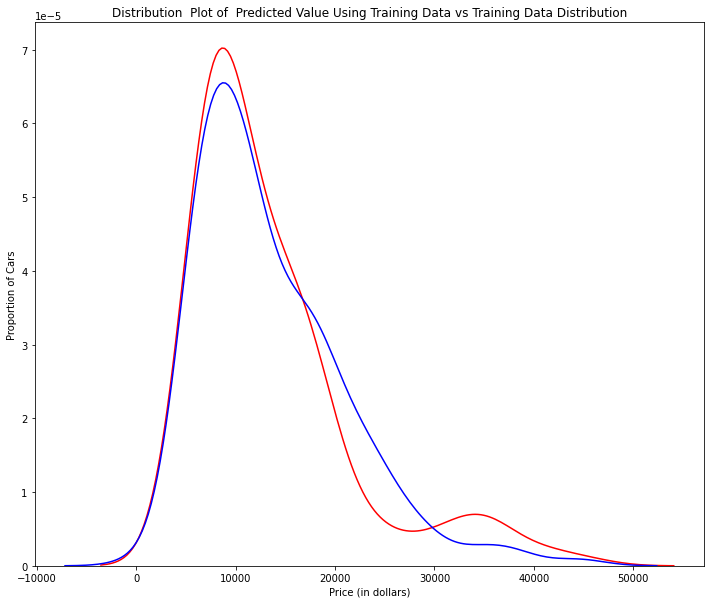

In [372]:
# perform some model evaluation with plotting
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

# plot of predicted values using training data compared to actual values of training data

C:\Users\orgil\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\orgil\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


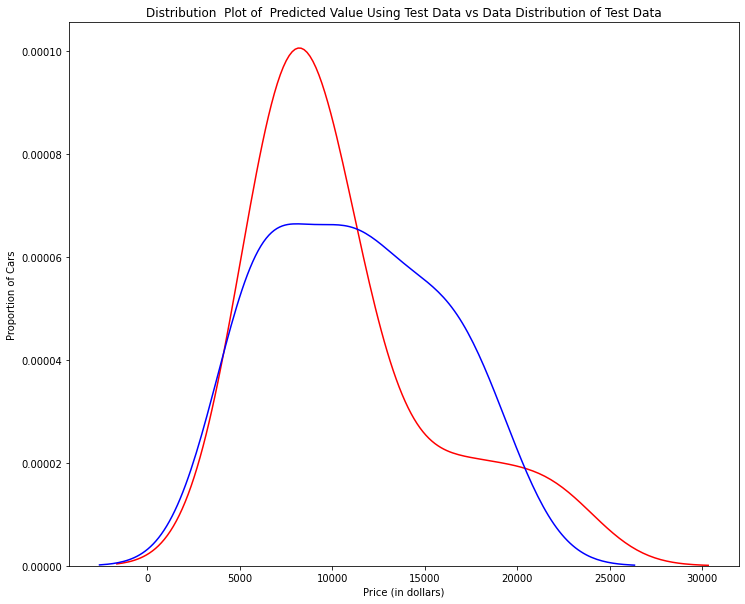

In [373]:
# plot of predicted value using test data vs actual values of test data
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Comparing these two graphs, it is evident that the test data of the first plot is much better at fitting the data. 

The largest difference in the second plot is in teh range of 5000-15000, where the shape is very different. 

Let's see if a polynomial regression also exhibits a drop in prediction accuracy when analyzing the test data set.

Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise.

In [374]:
# use a 55% of data for training
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [375]:
# perform degre 5 polynomial transformation
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [376]:
# create linear regression model
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [377]:
# see the output of the model with predict
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65566037,  7307.9878638 , 12213.7877412 , 18893.24796457,
       19995.95185894])

In [378]:
# compare predicted values to actual values
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65566037  7307.9878638  12213.7877412  18893.24796457]
True values: [ 6295. 10698. 13860. 13499.]


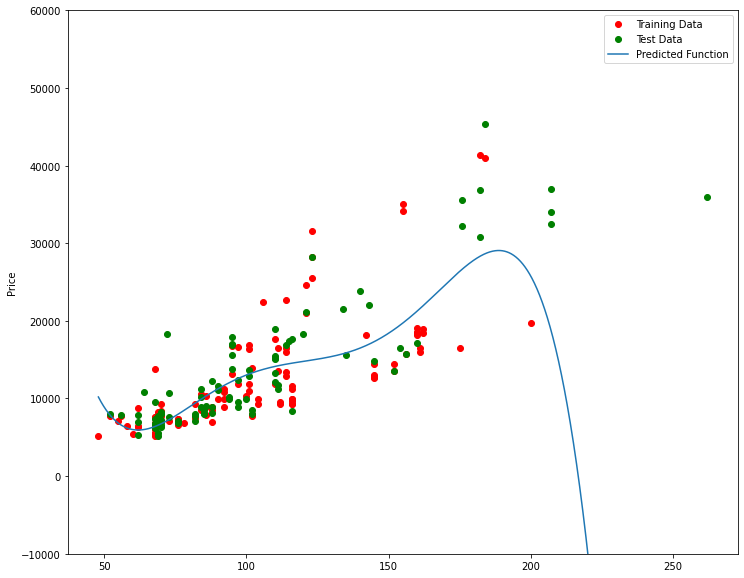

In [380]:
# use pollyplot to display the training data, testing data, and predicted function
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

# the estimated function appears to track the data, but diverges around 200 horsepower

In [381]:
# get Rsquare of training data
poly.score(x_train_pr, y_train)

0.5567716902121724

In [382]:
# get rsquare of test data
poly.score(x_test_pr, y_test)

-29.871340540625788

Text(3, 0.75, 'Maximum R^2 ')

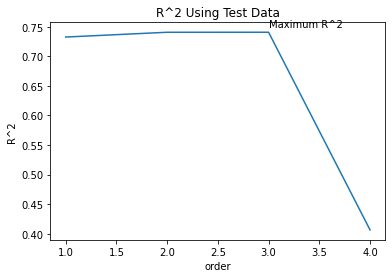

In [383]:
# observe how rsquare changes for the test data for different order polynomials, then plot results
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

pyplot.plot(order, Rsqu_test)
pyplot.xlabel('order')
pyplot.ylabel('R^2')
pyplot.title('R^2 Using Test Data')
pyplot.text(3, 0.75, 'Maximum R^2 ')    
# rsquare gradually increases until an order 3 polynomial is used.

In [384]:
# function used in next section
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

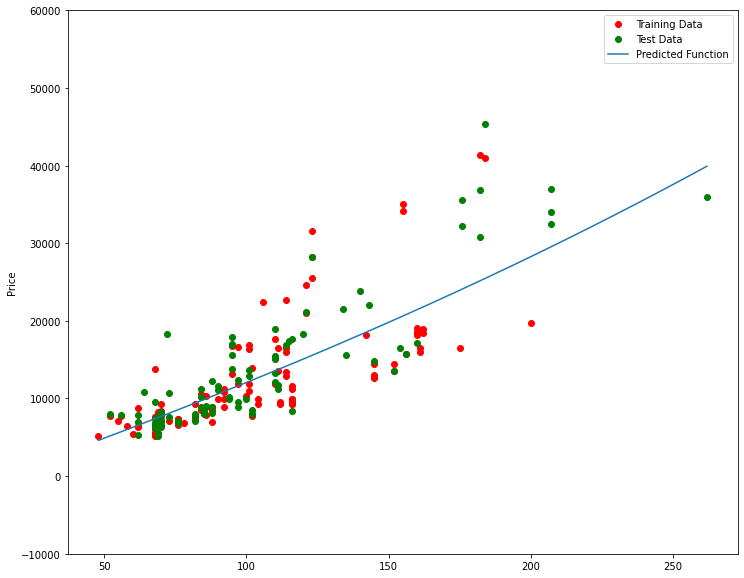

In [387]:
# interface used to interact with the polynomial orders
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

In [388]:
# create polynomial features object of degree 2
pr1=PolynomialFeatures(degree=2)

In [389]:
# transform the training and testing samples for horsepower, curbweight, engine size, and highway mpg
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [390]:
# find dimensions of new feature
x_train_pr1.shape #there are now 15 features

(110, 15)

In [391]:
# create linear regression model
poly1=LinearRegression().fit(x_train_pr1,y_train)

C:\Users\orgil\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\orgil\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


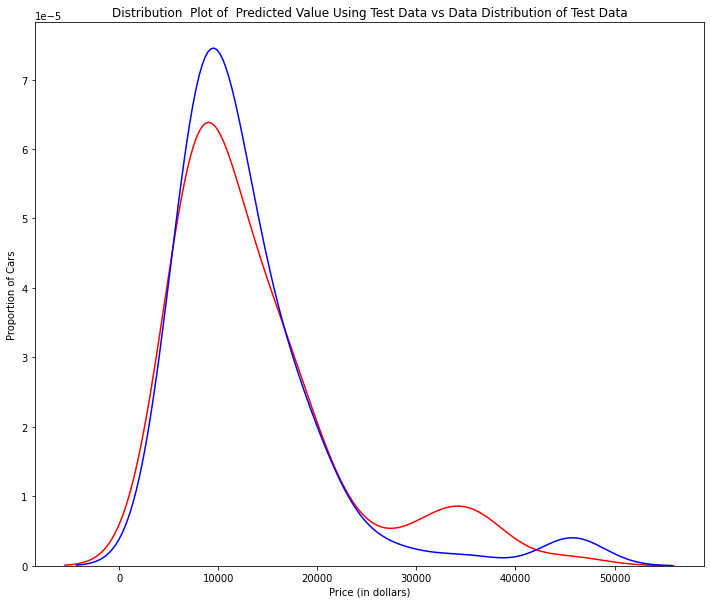

In [392]:
# use predict to get an output on polynomial features
yhat_test1=poly1.predict(x_test_pr1)

# plot the distribution
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

the predicted value is higher than the actual value for cars where the price is in the 10,000 range. 

Conversely, the predicted price is lower than the actual price in the 30-40k range. 

The model is not as accurate at these ranges.

### Ridge Regression

In [393]:
# perform a degree 2 polynomial transformation
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [405]:
# create ridge object
RigeModel=Ridge(alpha=1)

In [406]:
# fit the model
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [407]:
# obtain prediction
yhat = RigeModel.predict(x_test_pr)

In [408]:
# compare predicted samples to test set
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


In [409]:
# select the value of alpha that minimizes test error.

from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|████████████████████████████████████████| 1000/1000 [00:02<00:00, 482.28it/s, Test Score=0.564, Train Score=0.859]


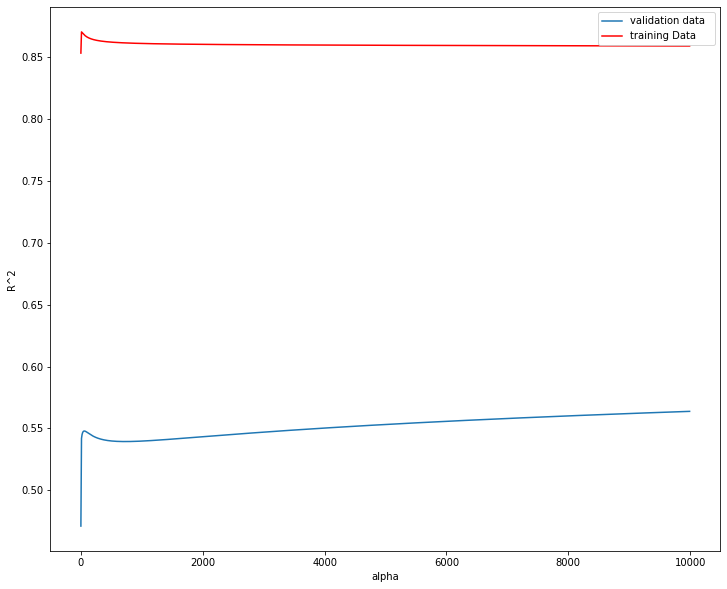

In [410]:
# plot the value of Rsquare for different alphas
width = 12
height = 10
pyplot.figure(figsize=(width, height))

pyplot.plot(Alpha,Rsqu_test, label='validation data  ')
pyplot.plot(Alpha,Rsqu_train, 'r', label='training Data ')
pyplot.xlabel('alpha')
pyplot.ylabel('R^2')
pyplot.legend()

The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.

Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.

In [411]:
# calculate rsquare using polynomial features
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440206702

### Grid Search

In [413]:
# create dictionary of parameter values
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [414]:
# create ridge regression object
RR=Ridge()
RR

Ridge()

In [417]:
# create ridge gridsearch object
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [418]:
# fit the model
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [419]:
# find the best parameter values on the validation data
# obtain the estimator with best parameters
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [420]:
# test model on the test data
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152

In [421]:
# perform a grid search for the alpha parameter and normalization parameter and find the best values
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

Ridge(alpha=0.1, normalize=True)